<a href="https://colab.research.google.com/github/nicoataiza/CS7318/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !pip3 install --upgrade pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
col_names = ['Target','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigree','Age']
df = pd.read_csv(r'/content/drive/MyDrive/Uni of Adelaide/CS7318/Assignment 1/indian_diabetes_scaled.csv',header=None,names=col_names,index_col=False)

In [5]:
df.columns

Index(['Target', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigree', 'Age'],
      dtype='object')

In [6]:
for col in df.columns[1:]:
  df[col] = df[col].apply(lambda x: float(x[2:]) if type(x) == str else float('NaN'))

In [7]:
# Change the values: replace the value of no diabetes to 0 instead of -1.
df['Target'] = df['Target'].replace(-1,0)

In [8]:
df.head()

,Target,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,0,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,0,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


In [9]:
df.dtypes

Target                int64
Pregnancies         float64
Glucose             float64
BloodPressure       float64
SkinThickness       float64
Insulin             float64
BMI                 float64
DiabetesPedigree    float64
Age                 float64
dtype: object

In [10]:
df.shape

(768, 9)

In [11]:
df.Target.value_counts()

1    500
0    268
Name: Target, dtype: int64

[Text(0, 0, '268'), Text(0, 0, '500')]

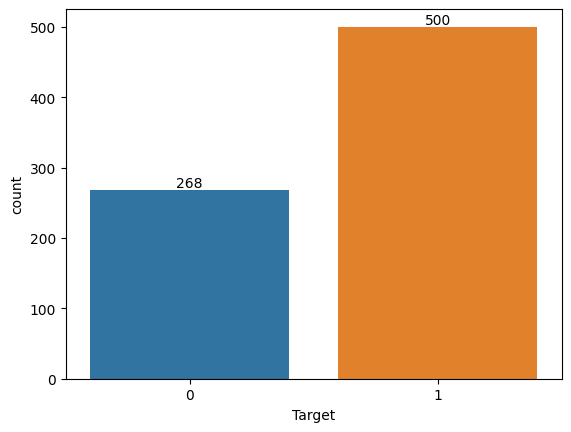

In [12]:
ax = sns.countplot(x=df.Target)

# Taken from https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
abs_values = df.Target.value_counts(ascending=True).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

Based on how the data is codified, Target = 1 pertains to having no diabetes, and Target = 0 pertains to having diabetes.

# Check for missing Data

In [13]:
df.isna().sum()

Target              0
Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 9
dtype: int64

We have missing data. 9 instances of the feature Age is missing. Given that, the missing data only comprises 1.17% of our dataset. We will drop the rows with missing data.

# Dropping the rows with missing data

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(759, 9)

[Text(0, 0, '263'), Text(0, 0, '496')]

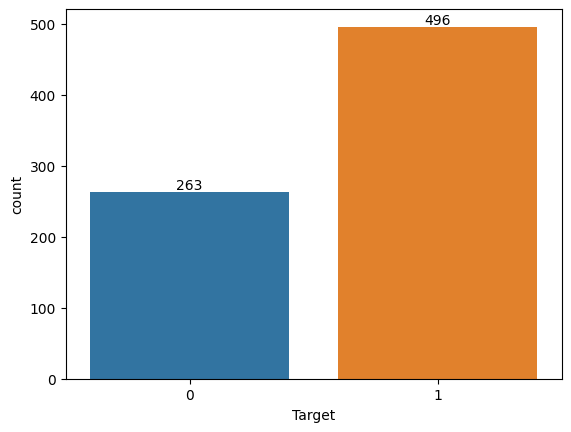

In [16]:
ax = sns.countplot(x=df.Target)

# Taken from https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
abs_values = df.Target.value_counts(ascending=True).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

Of the missing data, 5 belong to class 0 and 4 belong to class 1.

# Inspecting the Data

<Axes: >

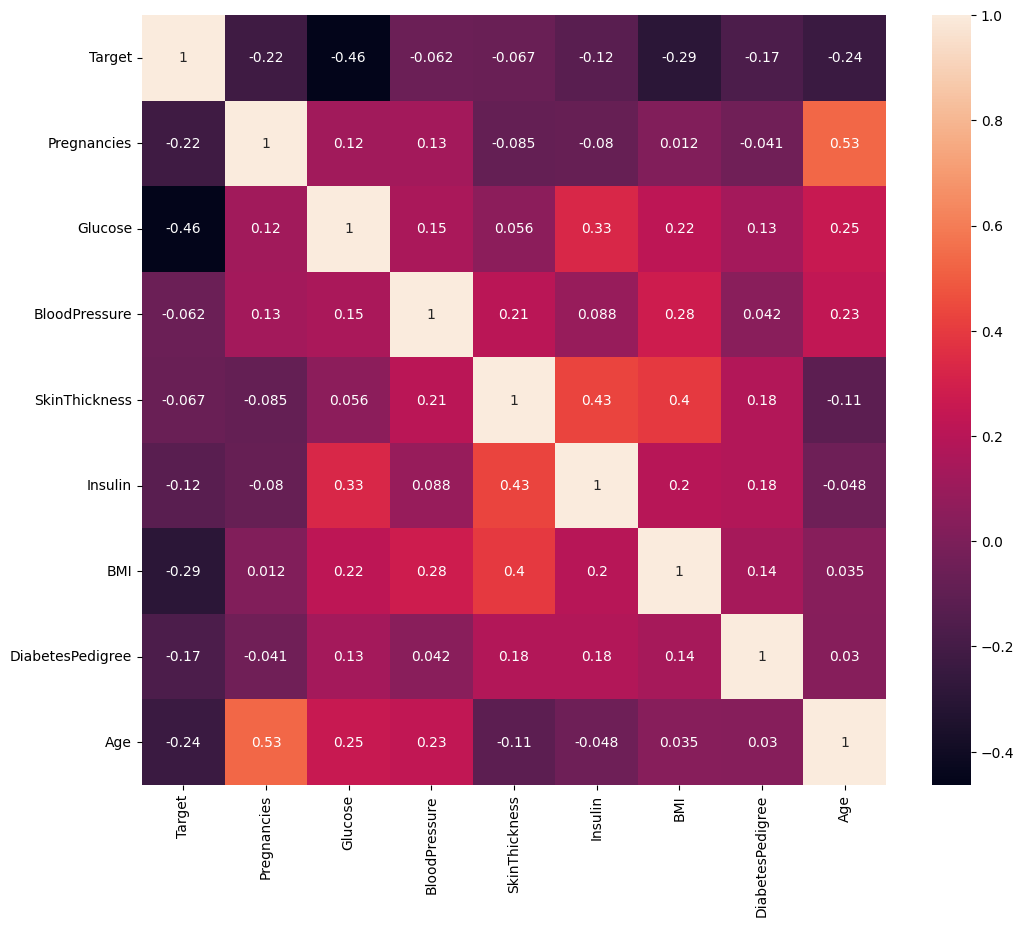

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [18]:
df.describe()

,Target,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,0.653491,-0.553902,0.211976,0.130392,-0.584860,-0.812335,-0.046738,-0.664571,-0.599166
std,0.476171,0.393479,0.321448,0.317587,0.322290,0.273006,0.235680,0.282291,0.388652
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858668,-0.900000
50%,1.000000,-0.647059,0.165829,0.180328,-0.535354,-0.940898,-0.046200,-0.749787,-0.733333
75%,1.000000,-0.294118,0.407035,0.311475,-0.353535,-0.703310,0.087929,-0.532878,-0.366667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# df = df[['Target','Age','BMI','Glucose','Pregnancies']]

# Splitting Dataset

I opted to use KFold here since the dataset only has 759 instances. We will do a train-test split with a proportion of of 80-20. Additionally, we will stratify the target for the model to learn about both classes since one is underrepresented.

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np

In [21]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=0,train_size = 0.80)

# Using Linear Classifiers to predict diabetes

In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [24]:
def evaluate_model(clf,
                   X_train,
                   y_train,
                   X_test,
                   y_test):
  clf.fit(X_train,y_train)
  print('Training data metrics')
  print('---------------------')
  y_train_pred = clf.predict(X_train)
  print('accuracy:', accuracy_score(y_train,y_train_pred))
  print('precision:', precision_score(y_train,y_train_pred))
  print('sensitivity:', recall_score(y_train,y_train_pred,pos_label=0))
  print('f1:', f1_score(y_train,y_train_pred))

  print()
  y_pred = clf.predict(X_test)

  print('Test data metrics')
  print('---------------------')
  print('accuracy:', accuracy_score(y_test,y_pred))
  print('precision:', precision_score(y_test,y_pred))
  print('sensitivity:', recall_score(y_test,y_pred,pos_label=0))
  print('f1:', f1_score(y_test,y_pred))

## Logistic Regression

For Logistic Regression, the scikit-learn library has a function specifically for Logistic Regression using cross-validation

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
evaluate_model(LogisticRegression(random_state=0), X_train,y_train,X_test,y_test)

Training data metrics
---------------------
accuracy: 0.7792421746293245
precision: 0.7981859410430839
sensitivity: 0.5761904761904761
f1: 0.8400954653937949

Test data metrics
---------------------
accuracy: 0.7697368421052632
precision: 0.7666666666666667
sensitivity: 0.4716981132075472
f1: 0.8401826484018264


## Support Vector Machines

In [27]:
from sklearn.svm import SVC

In [28]:
evaluate_model(SVC(random_state=0),X_train,y_train,X_test,y_test)

Training data metrics
---------------------
accuracy: 0.8056013179571664
precision: 0.8093126385809313
sensitivity: 0.5904761904761905
f1: 0.8608490566037738

Test data metrics
---------------------
accuracy: 0.7828947368421053
precision: 0.7946428571428571
sensitivity: 0.5660377358490566
f1: 0.8436018957345972


We see that SVMs slightly outperform Logistic Regression across multiple metrics except for Recall (or true positive rate). We can refer to this as our benchmark values to compare our neural networks to.

# Single Layer Perceptron

In [29]:
import torch
import numpy
import random

from torch.utils.data import DataLoader, TensorDataset

In [30]:
# Converting dataFrames into tensors
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

X_train_t = torch.from_numpy(X_train)
X_test_t = torch.from_numpy(X_test)
y_train_t = torch.from_numpy(y_train)
y_test_t = torch.from_numpy(y_test)

train_data_tensor = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_data_tensor, batch_size=32, shuffle=True, worker_init_fn=np.random.seed(0))

In [31]:
# https://medium.com/@shashankshankar10/introduction-to-neural-networks-build-a-single-layer-perceptron-in-pytorch-c22d9b412ccf
class SingleLayerNet(torch.nn.Module):
    def __init__(self, input_size):
        super(SingleLayerNet, self).__init__()
        self.input_layer = torch.nn.Linear(input_size, 1)

    #Define how forward-pass
    def forward(self, x):
        y_pred = torch.tanh(self.input_layer(x))
        return y_pred

In [32]:
# create the model
# 8 is the number of weights in the neural net
model = SingleLayerNet(df.shape[1]-1)

In [33]:
# Define the loss function (criterion)
criterion = torch.nn.BCEWithLogitsLoss()

# Create an optimizer (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)

In [34]:
# Define the training loop
epochs = 500
losses = []
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f'Epoch [{epoch+1}], Loss: {loss.item()}')

Epoch [1], Loss: 0.8229846358299255
Epoch [2], Loss: 0.856537401676178
Epoch [3], Loss: 0.7700604200363159
Epoch [4], Loss: 0.7786334156990051
Epoch [5], Loss: 0.7498670816421509
Epoch [6], Loss: 0.7564244866371155
Epoch [7], Loss: 0.8033584356307983
Epoch [8], Loss: 0.7145897746086121
Epoch [9], Loss: 0.731111466884613
Epoch [10], Loss: 0.7009391784667969
Epoch [11], Loss: 0.7227632999420166
Epoch [12], Loss: 0.6953609585762024
Epoch [13], Loss: 0.7051679491996765
Epoch [14], Loss: 0.7393996119499207
Epoch [15], Loss: 0.6888870000839233
Epoch [16], Loss: 0.6727898716926575
Epoch [17], Loss: 0.6936312913894653
Epoch [18], Loss: 0.6773630380630493
Epoch [19], Loss: 0.6521281599998474
Epoch [20], Loss: 0.648141622543335
Epoch [21], Loss: 0.6287654638290405
Epoch [22], Loss: 0.6736319661140442
Epoch [23], Loss: 0.6700352430343628
Epoch [24], Loss: 0.6666303873062134
Epoch [25], Loss: 0.628810465335846
Epoch [26], Loss: 0.6631073951721191
Epoch [27], Loss: 0.6306684017181396
Epoch [28], Lo

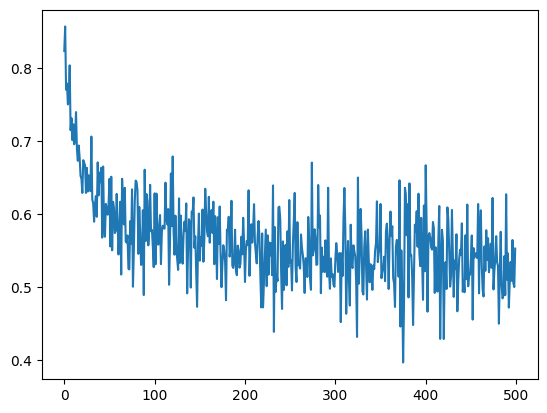

In [35]:
plt.plot(np.arange(0,500),losses)

In [36]:
model.eval()
with torch.no_grad():
    y_pred = model(X_train_t)
    y_pred = (y_pred >= 0.5).float()
    accuracy = (y_pred == y_train_t.view(-1, 1)).float().mean()
    print(f'Accuracy on train set: {accuracy.item()}')
print()
print('TRAIN DATA')
print('---------------------')
print('accuracy:', accuracy_score(y_train,y_pred))
print('precision:', precision_score(y_train,y_pred))
print('sensitivity:', recall_score(y_train,y_pred,pos_label=0))
print('f1:', f1_score(y_train,y_pred))

Accuracy on train set: 0.7644151449203491

TRAIN DATA
---------------------
accuracy: 0.7644151565074135
precision: 0.8469945355191257
sensitivity: 0.7333333333333333
f1: 0.8125819134993447


In [37]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t)
    y_pred = (y_pred >= 0.5).float()
    accuracy = (y_pred == y_test_t.view(-1, 1)).float().mean()
    print(f'Accuracy on test set: {accuracy.item()}')
print()
print('TEST')
print('---------------------')
print('accuracy:', accuracy_score(y_test,y_pred))
print('precision:', precision_score(y_test,y_pred))
print('sensitivity:', recall_score(y_test,y_pred,pos_label=0))
print('f1:', f1_score(y_test,y_pred))

Accuracy on test set: 0.7894737124443054

TEST
---------------------
accuracy: 0.7894736842105263
precision: 0.845360824742268
sensitivity: 0.7169811320754716
f1: 0.836734693877551


Model fails to converge which indicates that there might be optimizations that can be made.

## SLP with Xavier Initialization

Epoch [1], Loss: 0.8976134061813354
Epoch [2], Loss: 0.8645283579826355
Epoch [3], Loss: 0.9619789123535156
Epoch [4], Loss: 0.8101030588150024
Epoch [5], Loss: 0.8017512559890747
Epoch [6], Loss: 0.8164370059967041
Epoch [7], Loss: 0.811852753162384
Epoch [8], Loss: 0.7581180930137634
Epoch [9], Loss: 0.755916953086853
Epoch [10], Loss: 0.790780782699585
Epoch [11], Loss: 0.8013076782226562
Epoch [12], Loss: 0.8006760478019714
Epoch [13], Loss: 0.7431321740150452
Epoch [14], Loss: 0.72295743227005
Epoch [15], Loss: 0.7493851184844971
Epoch [16], Loss: 0.6590389013290405
Epoch [17], Loss: 0.6982900500297546
Epoch [18], Loss: 0.7211080193519592
Epoch [19], Loss: 0.7084770798683167
Epoch [20], Loss: 0.7143956422805786
Epoch [21], Loss: 0.6417898535728455
Epoch [22], Loss: 0.6679824590682983
Epoch [23], Loss: 0.6798458099365234
Epoch [24], Loss: 0.638542890548706
Epoch [25], Loss: 0.6802723407745361
Epoch [26], Loss: 0.6807156801223755
Epoch [27], Loss: 0.6569176912307739
Epoch [28], Loss

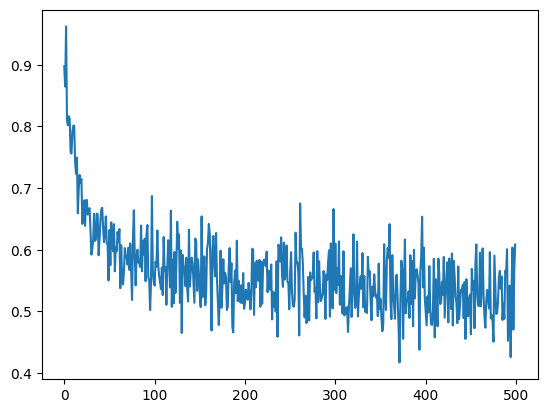

In [38]:
# https://stackoverflow.com/questions/49433936/how-do-i-initialize-weights-in-pytorch
class SingleLayerNet(torch.nn.Module):
    def __init__(self, input_size):
        super(SingleLayerNet, self).__init__()
        self.input_layer = torch.nn.Linear(input_size, 1)
        torch.nn.init.xavier_uniform_(self.input_layer.weight,gain=1)

    #Define how forward-pass
    def forward(self, x):
        y_pred = torch.tanh(self.input_layer(x))
        return y_pred

# create the model
# 8 is the number of weights in the neural net
model = SingleLayerNet(df.shape[1]-1)

# Define the loss function (criterion)
criterion = torch.nn.BCEWithLogitsLoss()

# Create an optimizer (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)

# Define the training loop
epochs = 500
losses = []
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f'Epoch [{epoch+1}], Loss: {loss.item()}')

plt.plot(np.arange(0,epochs),losses)

In [39]:
model.eval()
with torch.no_grad():
    y_pred = model(X_train_t)
    y_pred = (y_pred >= 0.5).float()
    accuracy = (y_pred == y_train_t.view(-1, 1)).float().mean()
    print(f'Accuracy on train set: {accuracy.item()}')
print()
print('TRAIN DATA')
print('---------------------')
print('accuracy:', accuracy_score(y_train,y_pred))
print('precision:', precision_score(y_train,y_pred))
print('sensitivity:', recall_score(y_train,y_pred,pos_label=0))
print('f1:', f1_score(y_train,y_pred))

Accuracy on train set: 0.7578253746032715

TRAIN DATA
---------------------
accuracy: 0.7578253706754531
precision: 0.8396739130434783
sensitivity: 0.719047619047619
f1: 0.8078431372549021


In [40]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t)
    y_pred = (y_pred >= 0.5).float()
    accuracy = (y_pred == y_test_t.view(-1, 1)).float().mean()
    print(f'Accuracy on test set: {accuracy.item()}')
print()
print('TEST')
print('---------------------')
print('accuracy:', accuracy_score(y_test,y_pred))
print('precision:', precision_score(y_test,y_pred))
print('sensitvity:', recall_score(y_test,y_pred,pos_label=0))
print('f1:', f1_score(y_test,y_pred))

Accuracy on test set: 0.7697368264198303

TEST
---------------------
accuracy: 0.7697368421052632
precision: 0.8555555555555555
sensitvity: 0.7547169811320755
f1: 0.8148148148148148


Our single layer perceptron has a test accuracy of 77.63%



## Confusion Matrix to Evaluate Model

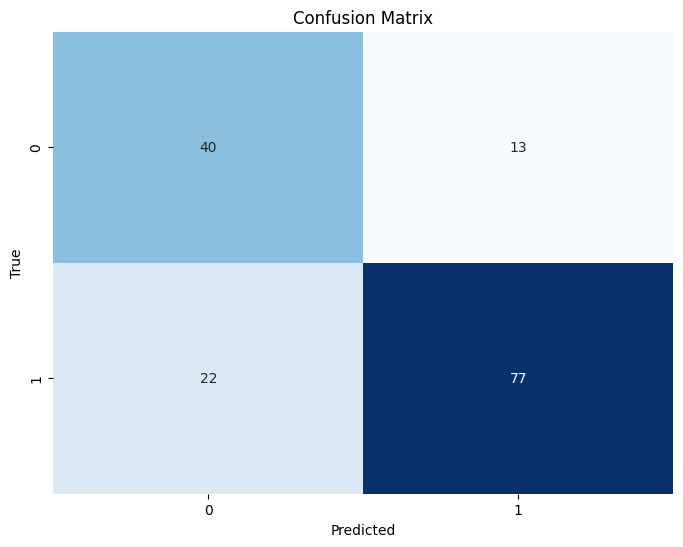

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()